In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting as pd_plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, GridSearchCV, validation_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, confusion_matrix, SCORERS

In [2]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [3]:
#Загрузка файлов
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Ideal,I,SI1,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,Premium,E,SI1,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,Premium,E,SI2,60.0,59.0,594,4.49,4.47,2.69
3,0.31,Ideal,D,VS2,59.4,56.0,879,4.45,4.40,2.63
4,2.01,Very Good,H,SI1,62.8,59.0,17759,7.99,8.04,5.03
...,...,...,...,...,...,...,...,...,...,...
40450,1.50,Very Good,D,SI1,60.7,62.0,11442,7.30,7.33,4.44
40451,1.51,Ideal,D,SI1,61.9,57.0,11834,7.35,7.42,4.57
40452,0.42,Ideal,G,SI2,60.9,56.0,971,4.87,4.89,2.97
40453,2.05,Premium,E,SI2,59.7,59.0,17237,8.39,8.27,4.97


In [4]:
# Словари
qual_d = {'Ideal':1,
        'Premium':2,
        'Very Good':3,
        'Good':4,
        'Fair':5,
       }
color_d = {'D':1,
           'E':2,
           'F':3,
           'G':4,
           'H':5,
           'I':6,
           'J':7,
          }
clarity_d = {'IF':1,
             'VVS1':2,
             'VVS2':3,
             'VS1':4,
             'VS2':5,
             'SI1':6,
             'SI2':7,
             'I1':8,
            }
df_train = df_train[~(df_train == 0).any(axis=1)]
df_train['cut'] = df_train['cut'].map(qual_d)
df_train['color'] = df_train['color'].map(color_d)
df_train['clarity'] = df_train['clarity'].map(clarity_d)
df_train

C:\Users\danil\AppData\Local\Temp/ipykernel_10344/3230058423.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cut'] = df_train['cut'].map(qual_d)
C:\Users\danil\AppData\Local\Temp/ipykernel_10344/3230058423.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['color'] = df_train['color'].map(color_d)
C:\Users\danil\AppData\Local\Temp/ipykernel_10344/3230058423.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,1,6,6,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,2,2,6,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,2,2,7,60.0,59.0,594,4.49,4.47,2.69
3,0.31,1,1,5,59.4,56.0,879,4.45,4.40,2.63
4,2.01,3,5,6,62.8,59.0,17759,7.99,8.04,5.03
...,...,...,...,...,...,...,...,...,...,...
40450,1.50,3,1,6,60.7,62.0,11442,7.30,7.33,4.44
40451,1.51,1,1,6,61.9,57.0,11834,7.35,7.42,4.57
40452,0.42,1,4,7,60.9,56.0,971,4.87,4.89,2.97
40453,2.05,2,2,7,59.7,59.0,17237,8.39,8.27,4.97


In [5]:
#Обзор данных
display(df_train.cut.value_counts())
display(df_train.clarity.value_counts())
display(df_train.color.value_counts())


1    16257
2    10295
3     9072
4     3636
5     1181
Name: cut, dtype: int64

6    9794
5    9192
7    6837
4    6142
3    3823
2    2736
1    1360
8     557
Name: clarity, dtype: int64

4    8434
2    7388
3    7193
5    6214
1    5122
6    3995
7    2095
Name: color, dtype: int64

In [6]:
#Разбивка на тренировочную и тестовую выборки
X = df_train.drop('price', axis=1)
y = df_train.price
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [7]:
#Самая простая линейная модель
dia_lin = make_pipeline(LinearRegression())
dia_lin.fit(X_train, y_train)
print(dia_lin.score(X_train, y_train))
print(dia_lin.score(X_test, y_test))

0.9066280767954649
0.9021813068677265


In [8]:
dia_ridge = make_pipeline(MinMaxScaler(), Ridge())
kfold = KFold(n_splits=10, shuffle=True)
param_grid =[{'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.8,1,1.2,1.4,1.6,1.8,2]}]
grid1 = GridSearchCV(dia_ridge, param_grid, cv=kfold, return_train_score=True)
grid1.fit(X_train,y_train)
print("R^2 наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid1.best_score_)) 
print("R^2 для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid1.score(X_test, y_test)))
print("Наилучшие параметры:\n{}\n".format(grid1.best_params_))

R^2 наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.906139

R^2 для наилучшей модели на тестовом наборе: 0.903719

Наилучшие параметры:
{'ridge__alpha': 0.2}



In [9]:
gridresults1 = pd.DataFrame(grid1.cv_results_)
display(gridresults1.sort_values(["rank_test_score"]).T)

,5,6,7,4,3,8,2,1,0,9,10,11,12,13,14,15
mean_fit_time,0.043414,0.037708,0.031308,0.04221,0.04101,0.037208,0.036709,0.03911,0.040509,0.04621,0.107619,0.078195,0.049111,0.044509,0.063114,0.065215
std_fit_time,0.004247,0.004693,0.001345,0.002563,0.003579,0.007993,0.003036,0.004416,0.006592,0.006955,0.068688,0.052708,0.010214,0.009168,0.021201,0.030408
mean_score_time,0.006897,0.006502,0.004601,0.006402,0.007202,0.006402,0.006202,0.007802,0.006903,0.007604,0.014603,0.007703,0.008702,0.014206,0.010905,0.010202
std_score_time,0.001225,0.001689,0.00049,0.00102,0.000873,0.002201,0.000873,0.005493,0.001136,0.002244,0.007554,0.003227,0.004027,0.018667,0.008462,0.00382
param_ridge__alpha,0.2,0.3,0.4,0.1,0.05,0.5,0.01,0.005,0.001,0.8,1,1.2,1.4,1.6,1.8,2
params,{'ridge__alpha': 0.2},{'ridge__alpha': 0.3},{'ridge__alpha': 0.4},{'ridge__alpha': 0.1},{'ridge__alpha': 0.05},{'ridge__alpha': 0.5},{'ridge__alpha': 0.01},{'ridge__alpha': 0.005},{'ridge__alpha': 0.001},{'ridge__alpha': 0.8},{'ridge__alpha': 1},{'ridge__alpha': 1.2},{'ridge__alpha': 1.4},{'ridge__alpha': 1.6},{'ridge__alpha': 1.8},{'ridge__alpha': 2}
split0_test_score,0.906912,0.906853,0.906786,0.906963,0.906987,0.906713,0.907005,0.907007,0.907009,0.906448,0.906239,0.906008,0.905757,0.905489,0.905207,0.904912
split1_test_score,0.916693,0.916554,0.916409,0.916823,0.916886,0.916258,0.916934,0.91694,0.916944,0.91577,0.915423,0.91506,0.914685,0.9143,0.913908,0.913508
split2_test_score,0.902352,0.902403,0.90243,0.902263,0.902198,0.902436,0.902131,0.902122,0.902114,0.902369,0.902269,0.902136,0.901974,0.901788,0.901581,0.901357
split3_test_score,0.905588,0.905637,0.905674,0.905528,0.905495,0.905699,0.905466,0.905462,0.905459,0.905712,0.905671,0.905596,0.905491,0.90536,0.905204,0.905028


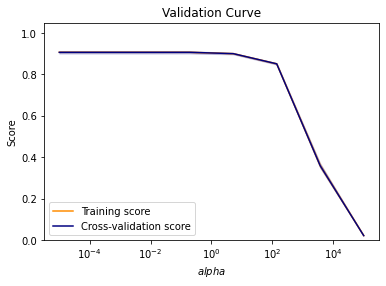

In [10]:
pipe = grid1.best_estimator_

n_range = np.logspace(-5, 5, num=8, endpoint=True, base=10.0)
train_scores, test_scores = validation_curve(
    pipe, X_train, y_train,
    param_name ="ridge__alpha", 
    param_range = n_range,
    cv=KFold(n_splits=10, shuffle=True, random_state=0), 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.title("Validation Curve")
plt.xlabel("$alpha$")
plt.ylabel("Score")
plt.ylim(0, 1.05)

plt.semilogx(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.semilogx(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

In [11]:
#Лассо-модель
dia_lasso = make_pipeline(MinMaxScaler(), Lasso())
kfold = KFold(n_splits=5, shuffle=True)
param_grid =[{'lasso__alpha':[0.001,0.01,0.1,0.5,1,1.5,2]}]
grid2 = GridSearchCV(dia_lasso, param_grid, cv=kfold, return_train_score=True)
grid2.fit(X_train,y_train)
print("R^2 наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid2.best_score_)) 
print("R^2 для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid2.score(X_test, y_test)))
print("Наилучшие параметры:\n{}\n".format(grid2.best_params_))

c:\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.702e+10, tolerance: 3.934e+07
  model = cd_fast.enet_coordinate_descent(
c:\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e+10, tolerance: 3.825e+07
  model = cd_fast.enet_coordinate_descent(
c:\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.932e+09, tolerance: 3.898e

R^2 наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.906238

R^2 для наилучшей модели на тестовом наборе: 0.906106

Наилучшие параметры:
{'lasso__alpha': 0.5}



In [12]:
gridresults2 = pd.DataFrame(grid2.cv_results_)
display(gridresults2.sort_values(["rank_test_score"]).T)

,3,4,5,6,2,1,0
mean_fit_time,0.344069,0.237053,0.132227,0.09862,0.916387,1.695341,1.701141
std_fit_time,0.075765,0.09456,0.017705,0.005351,0.294832,0.516151,0.43637
mean_score_time,0.016007,0.0062,0.006004,0.007003,0.0066,0.007803,0.008603
std_score_time,0.016508,0.00075,0.000898,0.001416,0.000802,0.00098,0.001743
param_lasso__alpha,0.5,1,1.5,2,0.1,0.01,0.001
params,{'lasso__alpha': 0.5},{'lasso__alpha': 1},{'lasso__alpha': 1.5},{'lasso__alpha': 2},{'lasso__alpha': 0.1},{'lasso__alpha': 0.01},{'lasso__alpha': 0.001}
split0_test_score,0.907356,0.906571,0.905497,0.904375,0.907703,0.907704,0.9077
split1_test_score,0.910972,0.910258,0.909299,0.908134,0.857354,0.813742,0.808571
split2_test_score,0.90542,0.905267,0.904902,0.904462,0.905369,0.905421,0.905423
split3_test_score,0.904044,0.903828,0.90326,0.902513,0.903998,0.903992,0.903991


In [13]:
#Построение эластичной сетки
d_net=make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          ElasticNet() 
                         )
pipe = Pipeline([('preprocessing', MinMaxScaler()),
                 ('features', PolynomialFeatures(degree=2, include_bias=False)),
                 ('regresion', ElasticNet(tol=0.1))])

cv=ShuffleSplit(n_splits=10,  test_size=0.3)
param_grid =[
    {'regresion__l1_ratio': [.1, .5, .7, .9, .95, 0.99, 1],
     'regresion__alpha': [10**(-6),10**(-5),10**(-4),10**(-3),10**(-2)]
     }
]

grid3 = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True)
grid3.fit(X_train,y_train)

print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid3.best_params_))
print("Осредненный R-квадрат для наилучшей модели кроссвалидации на проверочных тренировочных наборах: {:.6f}\n".format(grid3.best_score_))
print("R-квадрат на тестовом наборе: {:.2f}".format(grid3.score(X_test, y_test)))
gridresults3 = pd.DataFrame(grid3.cv_results_)
display(gridresults3.sort_values(["rank_test_score"]).T)

Словарь с параметрами для лучшего решения:
{'regresion__alpha': 0.01, 'regresion__l1_ratio': 1}

Осредненный R-квадрат для наилучшей модели кроссвалидации на проверочных тренировочных наборах: 0.909947

R-квадрат на тестовом наборе: 0.91


,34,27,20,13,6,5,4,12,3,2,...,14,24,23,32,22,21,31,30,29,28
mean_fit_time,0.143729,0.225943,0.121124,0.233948,0.169733,0.156732,0.233847,0.143128,0.271005,0.273255,...,0.143533,0.143929,0.117923,0.14063,0.116822,0.118123,0.142028,0.223044,0.267647,0.282756
std_fit_time,0.008709,0.075406,0.006879,0.110991,0.077329,0.042706,0.10582,0.006008,0.108296,0.10613,...,0.05159,0.005578,0.004482,0.001909,0.00328,0.0027,0.005569,0.026105,0.050706,0.063566
mean_score_time,0.027907,0.048811,0.025307,0.047907,0.035709,0.030506,0.048011,0.028106,0.057011,0.079916,...,0.026803,0.028707,0.023607,0.028806,0.024507,0.023508,0.029408,0.02781,0.042062,0.04472
std_score_time,0.002508,0.023749,0.002326,0.016851,0.014761,0.005627,0.028595,0.002166,0.030942,0.060216,...,0.005054,0.001953,0.0008,0.001536,0.002013,0.000672,0.001855,0.002227,0.016836,0.013269
param_regresion__alpha,0.01,0.001,0.0001,0.00001,0.000001,0.000001,0.000001,0.00001,0.000001,0.000001,...,0.0001,0.001,0.001,0.01,0.001,0.001,0.01,0.01,0.01,0.01
param_regresion__l1_ratio,1,1,1,1,1,0.99,0.95,0.99,0.9,0.7,...,0.1,0.9,0.7,0.95,0.5,0.1,0.9,0.7,0.5,0.1
params,"{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 0.0001, 'regresion__l1_ra...","{'regresion__alpha': 1e-05, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 1e-05, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...",...,"{'regresion__alpha': 0.0001, 'regresion__l1_ra...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.01, 'regresion__l1_rati..."
split0_test_score,0.91939,0.919399,0.9194,0.9194,0.9194,0.9194,0.9194,0.9194,0.9194,0.919399,...,0.919022,0.918979,0.918101,0.917179,0.917179,0.915228,0.914722,0.905562,0.896045,0.880764
split1_test_score,0.909841,0.909844,0.909844,0.909845,0.909845,0.909845,0.909844,0.909844,0.909844,0.909844,...,0.909742,0.909728,0.909424,0.909047,0.909051,0.908147,0.907892,0.904339,0.895278,0.882591
split2_test_score,0.907181,0.907095,0.907086,0.907085,0.907085,0.907085,0.907085,0.907085,0.907085,0.907084,...,0.906674,0.906637,0.90571,0.90483,0.904746,0.902666,0.902189,0.40038,0.371296,0.397476


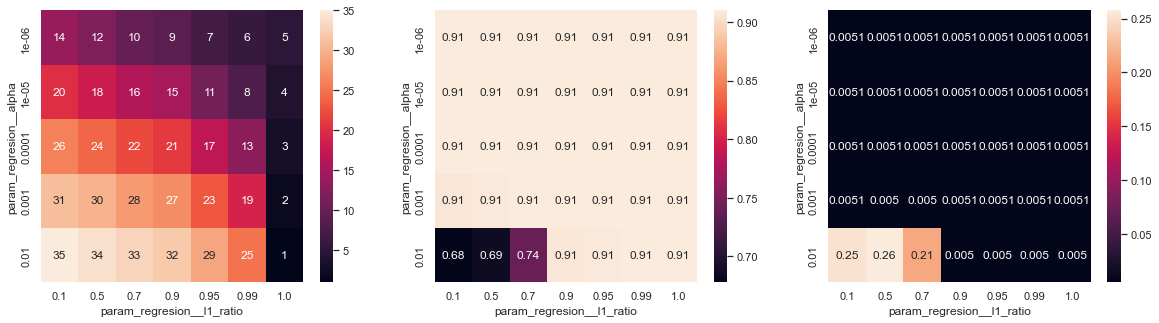

In [14]:
#Обзор параметров сетки
sns.set()
fig,ax = plt.subplots(1, 3, figsize=(20,5))

ax = plt.subplot(1, 3, 1)
pvt_rank = gridresults3.pivot(index ='param_regresion__alpha', columns = 'param_regresion__l1_ratio',
                             values = 'rank_test_score')
sns.heatmap(pvt_rank,annot=True);
ax = plt.subplot(1, 3, 2)
pvt_mean = gridresults3.pivot(index ='param_regresion__alpha', columns = 'param_regresion__l1_ratio',
                             values = 'mean_test_score')
sns.heatmap(pvt_mean,annot=True);
ax = plt.subplot(1, 3, 3)
pvt_std = gridresults3.pivot(index = 'param_regresion__alpha', columns ='param_regresion__l1_ratio',
                            values = 'std_test_score')
sns.heatmap(pvt_std,annot=True);

In [15]:
#Лучшие параметры в трубу помещаем
param = grid3.best_params_
pipe_best = pipe.set_params(**param)#.set_params(**{'memory': memory})

pipe_best

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('features', PolynomialFeatures(include_bias=False)),
                ('regresion', ElasticNet(alpha=0.01, l1_ratio=1, tol=0.1))])

In [16]:
#Обучаем трубу и предсказываем
pipe_best.fit(X_train, y_train)
y_best = pipe_best.predict(X_test)
pipe_best.score(X_test, y_test)

0.9146549423942063

In [17]:
#Расписываем трубу руками
my_pipeline = make_pipeline(MinMaxScaler(),
                            PolynomialFeatures(include_bias=False),
                            ElasticNet(alpha=0.01, l1_ratio=0.9, tol=0.1))
my_pipeline.fit(X, y)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('elasticnet', ElasticNet(alpha=0.01, l1_ratio=0.9, tol=0.1))])

In [18]:
# Словари
qual_d = {'Ideal':1,
        'Premium':2,
        'Very Good':3,
        'Good':4,
        'Fair':5,
       }
color_d = {'D':1,
           'E':2,
           'F':3,
           'G':4,
           'H':5,
           'I':6,
           'J':7,
          }
clarity_d = {'IF':1,
             'VVS1':2,
             'VVS2':3,
             'VS1':4,
             'VS2':5,
             'SI1':6,
             'SI2':7,
             'I1':8,
            }
non_zero_index = ~(df_test == 0).any(axis=1)
#Отсеивание нулей в test.csv
df_test = df_test[non_zero_index]
df_test['cut'] = df_test['cut'].map(qual_d)
df_test['color'] = df_test['color'].map(color_d)
df_test['clarity'] = df_test['clarity'].map(clarity_d)
df_test

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,5,5,5,62.1,66.0,7.33,7.13,4.50
1,0.54,2,4,5,62.0,58.0,5.21,5.18,3.22
2,0.70,2,2,5,62.0,60.0,5.70,5.59,3.50
3,0.59,1,2,5,62.2,58.0,5.35,5.39,3.34
4,0.86,2,3,7,61.8,58.0,6.12,6.15,3.79
...,...,...,...,...,...,...,...,...,...
13480,1.51,3,2,5,62.4,58.0,7.26,7.33,4.55
13481,1.00,1,6,4,63.1,57.0,6.32,6.39,4.01
13482,0.70,3,2,6,59.6,63.0,5.72,5.65,3.39
13483,0.58,1,3,6,62.2,57.0,5.37,5.33,3.33


In [19]:
y_predict = my_pipeline.predict(df_test)
# NON_ZERO_INDEX ПРИМЕНИТЬ К у_test

In [20]:
y_predict

array([8928.50452262, 1954.3266253 , 3845.59621291, ..., 2980.53299935,
       2039.61059593, 1785.47496718])